In [19]:
""""
Figaro times collection times script. 
"""
import numpy as np
import pandas as pd
import os
import regex as re
from openpyxl import load_workbook, Workbook
from openpyxl.utils.cell import get_column_letter

path_src = "/local/scratch/Figaro/figaro-code"
exp_names = ["mkl"]
exp_paths = {"figaro": "comparisons/accuracy/figaro", "mkl": "comparisons/accuracy/python/numpy"}
db_names = ["DBRetailer", "DBFavorita", "DBYelp"]
join_orderds = {"DBRetailer": "LocationRoot48", "DBFavorita": "OilRoot48", "DBYelp": "BusinessRoot48"}
start_per = 10
end_per = 100
per_inc = 10

num_measurement = 5

txt_name = "error.txt"
numeric_const_pattern = r"Relative error is: ([+-]?(\d+(\.\d*)?|\.\d+)([eE][+-]?\d+)?)"
rx = re.compile(numeric_const_pattern)

df_measurement_exps = {}
for exp_name in exp_names: 
    exp_path = exp_paths[exp_name]
    perf_path = os.path.join(path_src, exp_path)
    df_measurement = pd.DataFrame(columns=db_names)

    for db_name in db_names:
        join_order = join_orderds[db_name]

        for db_idx, percent in enumerate(range(start_per, end_per + 1, per_inc)): 
            db_name_per = "{}{}".format(db_name, percent)
            path_txt = os.path.join(perf_path, db_name_per, join_order, txt_name)
            with open(path_txt, 'r') as file_accur:
                for line in file_accur:
                    print(line)
                    match = rx.search(line)
                    print(match)
                    if match:
                        relative_error = float(match.group(1))

            df_measurement.at[percent, db_name] = relative_error
            
        #out_workbook.save(gather_times_path)
        print(df_measurement)
        
    df_measurement_exps[exp_name] = df_measurement





Absolute error is: 2.1870915702767975e-05

None
Frobenius norm of comp is: 428000768.1868822

None
Relative error is: 5.110017861747917e-14

<regex.Match object; span=(0, 40), match='Relative error is: 5.110017861747917e-14'>
Absolute error is: 5.617464334140568e-05

None
Frobenius norm of comp is: 603752185.0218724

None
Relative error is: 9.304255079320437e-14

<regex.Match object; span=(0, 40), match='Relative error is: 9.304255079320437e-14'>
Absolute error is: 0.00010729068513515947

None
Frobenius norm of comp is: 741395068.1842625

None
Relative error is: 1.447145924478877e-13

<regex.Match object; span=(0, 40), match='Relative error is: 1.447145924478877e-13'>
Absolute error is: 0.00018005650566163116

None
Frobenius norm of comp is: 859124853.9153528

None
Relative error is: 2.0958130222987546e-13

<regex.Match object; span=(0, 41), match='Relative error is: 2.0958130222987546e-13'>
Absolute error is: 0.0002742599547987124

None
Frobenius norm of comp is: 966395737.5719298

No

{'mkl':       DBRetailer   DBFavorita       DBYelp
10   5.11002e-14  7.00432e-12  6.60588e-07
20   9.30426e-14  2.34297e-11  2.95414e-08
30   1.44715e-13  9.14912e-11  2.35375e-07
40   2.09581e-13  1.41878e-10   7.1242e-07
50   2.83797e-13  2.36582e-10  1.20456e-06
60   3.81899e-13  3.57858e-10  6.60588e-07
70   3.28915e-13  4.63892e-10  7.09085e-07
80   3.79263e-13  5.78295e-10  1.55658e-06
90   6.99929e-13  7.01428e-10  5.77211e-07
100  6.79522e-13   1.8798e-13  1.54583e-06}
mkl
10     5.11002e-14
20     9.30426e-14
30     1.44715e-13
40     2.09581e-13
50     2.83797e-13
60     3.81899e-13
70     3.28915e-13
80     3.79263e-13
90     6.99929e-13
100    6.79522e-13
Name: DBRetailer, dtype: object
10     7.00432e-12
20     2.34297e-11
30     9.14912e-11
40     1.41878e-10
50     2.36582e-10
60     3.57858e-10
70     4.63892e-10
80     5.78295e-10
90     7.01428e-10
100     1.8798e-13
Name: DBFavorita, dtype: object
10     6.60588e-07
20     2.95414e-08
30     2.35375e-07
40      7.124

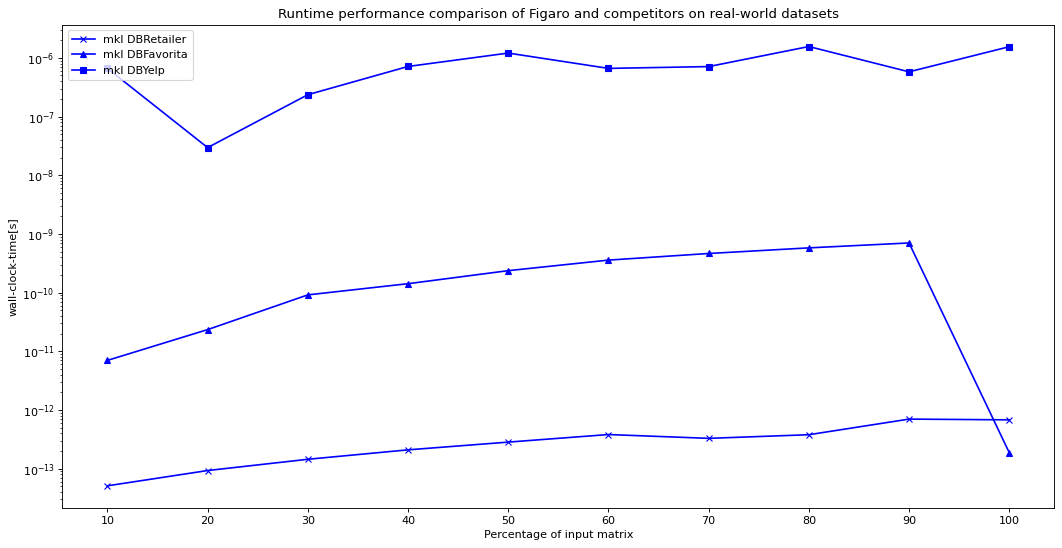

In [21]:
import matplotlib.pyplot as plt

plt.figure("name", figsize=(16, 8), dpi=80)
plt.xlabel("Percentage of input matrix")
plt.ylabel("wall-clock-time[s]")

plt.title("Runtime performance comparison of Figaro and competitors on real-world datasets")

plt.yscale('log', base=10)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='x', nbins=10)
db_marker =  {"DBFavorita": "^", "DBYelp": "s", "DBRetailer": "x"}
exp_colour = {"figaro": "r", "mkl": "b"}

print(df_measurement_exps)
for exp_name in exp_names:
    print(exp_name)
    df_measurement = df_measurement_exps[exp_name]
    for db_name in df_measurement:
        print(df_measurement[db_name])
        plt.plot(df_measurement[db_name], "-" + exp_colour[exp_name] + db_marker[db_name], label="{} {}".format(exp_name, db_name))
plt.legend(loc="upper left")

plt.show()